### **Evaluation des modèles**

**Importation des bibliothèques et des modèles sauvegardés**

In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

# Chargement des ensembles de test
X_test = pd.read_csv('../data/X_test.csv')
y_test = pd.read_csv('../data/y_test.csv')

# Chargement des modèles sauvegardés
import joblib
logistic_model = joblib.load('../models/logistic_model.pkl')
decision_tree_model = joblib.load('../models/decision_tree_model.pkl')
random_forest_model = joblib.load('../models/random_forest_model.pkl')


**Prédictions et métriques pour chaque modèle**

=== Régression Logistique ===
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56863
           1       0.99      0.97      0.98     56863

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



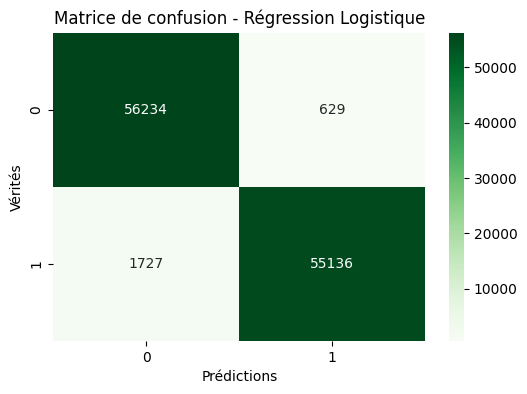

In [2]:
# Prédictions et probabilités
y_pred_logistic = logistic_model.predict(X_test)
y_pred_logistic_prob = logistic_model.predict_proba(X_test)[:, 1]

# Matrice de confusion
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Rapport de classification
print("=== Régression Logistique ===")
print(classification_report(y_test, y_pred_logistic))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Greens')
plt.title('Matrice de confusion - Régression Logistique')
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.savefig('../results/report/evaluation/mc-LogisticRegression.png')

plt.show()


La matrice de confusion pour le modèle de régression logistique montre que 56,234 transactions légitimes ont été correctement classifiées, tandis que 629 transactions légitimes ont été incorrectement identifiées comme frauduleuses. Concernant les transactions frauduleuses, 55,136 d'entre elles ont été correctement détectées comme telles, mais 1,727 fraudes sont passées inaperçues, étant classées à tort comme légitimes.

Ces résultats indiquent que le modèle capte une bonne proportion des fraudes, mais le nombre relativement élevé de fraudes non détectées pourrait poser problème dans un contexte de détection de fraude en temps réel. Cela peut être attribué à la limite de la régression logistique, qui suppose une relation linéaire entre les variables

=== Arbre de décision ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



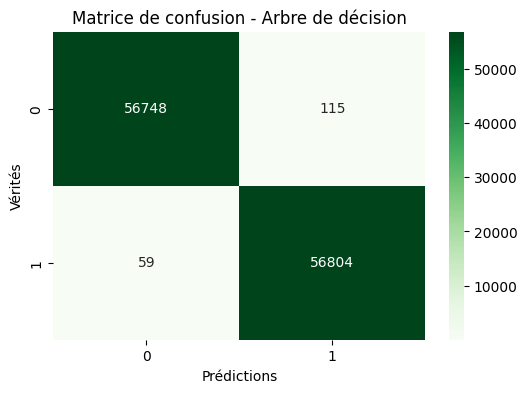

In [3]:
# Arbre de décision
y_pred_tree = decision_tree_model.predict(X_test)
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Rapport de classification
print("=== Arbre de décision ===")
print(classification_report(y_test, y_pred_tree))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens')
plt.title('Matrice de confusion - Arbre de décision')
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.savefig('../results/report/evaluation/mc-DecisionTree.png')

plt.show()



En comparant avec la régression logistique, le modèle d’arbre de décision montre une performance nettement améliorée. Sur les transactions légitimes, 56,748 ont été correctement classifiées, avec seulement 115 faux positifs. Pour les transactions frauduleuses, 56,804 ont été correctement détectées, et seulement 59 cas de fraude ont été manqués.

Ces résultats illustrent la capacité des arbres de décision à gérer des interactions complexes entre les variables et à mieux séparer les classes. Le très faible nombre de fraudes non détectées est un avantage important, car il réduit considérablement les risques liés aux transactions frauduleuses non identifiées. Toutefois, les arbres de décision ont tendance à surapprendre sur les données d’entraînement, ce qui pourrait affecter leurs performances sur de nouvelles données.

=== Forêt aléatoire ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



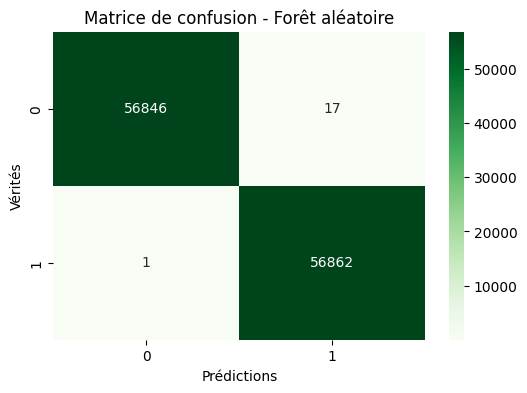

In [4]:

# la forêt aléatoire
y_pred_forest = random_forest_model.predict(X_test)
cm_forest = confusion_matrix(y_test, y_pred_forest)

# Rapport de classification
print("=== Forêt aléatoire ===")
print(classification_report(y_test, y_pred_forest))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(cm_forest, annot=True, fmt='d', cmap='Greens')
plt.title('Matrice de confusion - Forêt aléatoire')
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.savefig('../results/report/evaluation/mc-RandomForest.png')

plt.show()


Le modèle de forêt aléatoire offre des résultats presque parfaits. Il a correctement classé 56,846 transactions légitimes, avec seulement 17 faux positifs. De plus, il n'a raté qu'une seule fraude, avec 56,862 transactions frauduleuses correctement identifiées.

Ces performances exceptionnelles s'expliquent par la nature même des forêts aléatoires, qui combinent plusieurs arbres de décision pour réduire la variance et améliorer la robustesse du modèle. Le faible nombre de faux négatifs est particulièrement impressionnant dans le contexte de la détection de fraude, où l'échec à identifier une fraude peut avoir des conséquences coûteuses.

**Conclusion partielle**

En comparant les trois modèles, il est clair que la forêt aléatoire offre les meilleures performances globales, notamment grâce à son faible taux de faux négatifs. Le modèle d’arbre de décision, bien qu’un peu moins performant, reste une option viable avec de très bons résultats. La régression logistique, quant à elle, est rapide et simple à implémenter, mais ses limites deviennent évidentes lorsque les données sont complexes et déséquilibrées.

Pour une mise en production, la forêt aléatoire serait recommandée en raison de sa capacité à minimiser les fraudes non détectées. 

**Analyse des modèles avec les courbes ROC et AUC**

Les courbes ROC permettent d'évaluer la capacité d'un modèle à discriminer les classes positives et négatives à travers différents seuils de décision. L'AUC (Area Under the Curve) mesure la performance globale de cette discrimination.

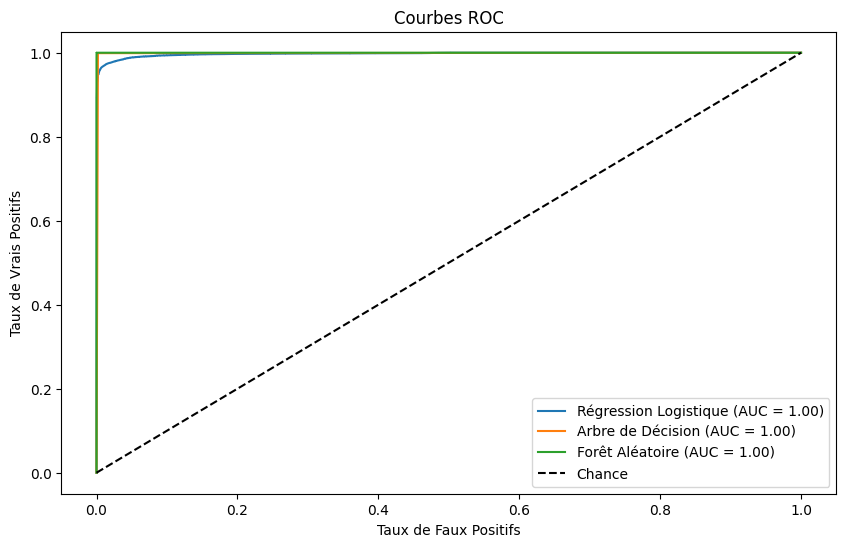

In [5]:
# Calcul des courbes ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_logistic_prob)
fpr_tree, tpr_tree, _ = roc_curve(y_test, decision_tree_model.predict_proba(X_test)[:, 1])
fpr_forest, tpr_forest, _ = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Calcul des scores AUC
auc_log = auc(fpr_log, tpr_log)
auc_tree = auc(fpr_tree, tpr_tree)
auc_forest = auc(fpr_forest, tpr_forest)

# Visualisation des courbes ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f"Régression Logistique (AUC = {auc_log:.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Arbre de Décision (AUC = {auc_tree:.2f})")
plt.plot(fpr_forest, tpr_forest, label=f"Forêt Aléatoire (AUC = {auc_forest:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbes ROC")
plt.legend()
plt.show()



- **Régression Logistique :**
La courbe ROC pour la régression logistique montre une très bonne capacité à discriminer entre transactions frauduleuses et non frauduleuses, avec une AUC de 0.9973. Cela indique que le modèle est capable de prédire correctement les transactions frauduleuses dans environ 99.73 % des cas.

- **Arbre de Décision :**
L'AUC pour l'arbre de décision est légèrement supérieure, à 0.9985, montrant une discrimination encore plus efficace. Cela reflète que le modèle prend des décisions avec une grande précision, même pour des seuils de classification variés.

- **Forêt Aléatoire :**
Ce modèle obtient une performance quasiment parfaite avec une AUC de 0.9999, ce qui démontre qu’il distingue presque parfaitement les deux classes. C'est le modèle le plus performant en termes de ROC et AUC.

Dans l'ensemble, bien que les trois modèles aient des AUC très élevées, la Forêt Aléatoire surpasse légèrement les deux autres, soulignant son efficacité à capturer la complexité des données.

**Analyse des modèles avec les courbes précision-rappel**
Les courbes Précision-Rappel sont particulièrement utiles dans le contexte des données déséquilibrées, comme c'est le cas ici avec les transactions frauduleuses.

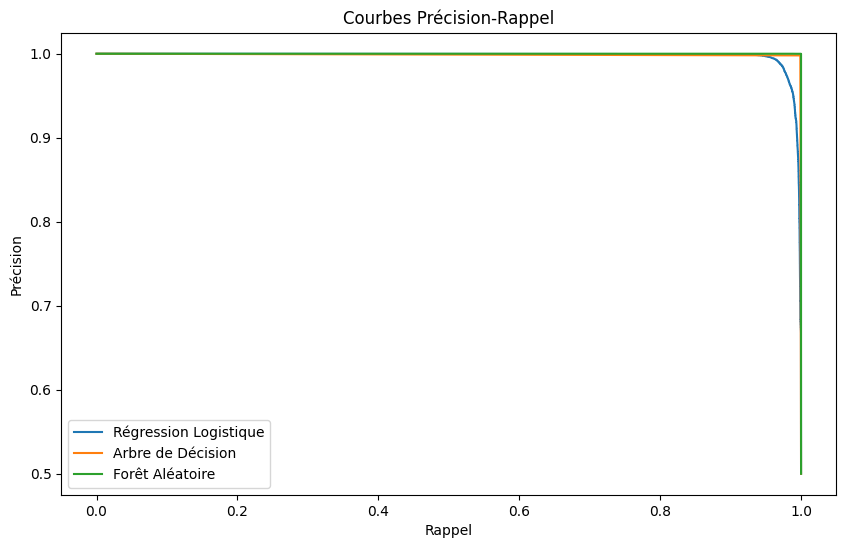

In [6]:
# Calcul des courbes précision-rappel
precision_log, recall_log, _ = precision_recall_curve(y_test, y_pred_logistic_prob)
precision_tree, recall_tree, _ = precision_recall_curve(y_test, decision_tree_model.predict_proba(X_test)[:, 1])
precision_forest, recall_forest, _ = precision_recall_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Visualisation des courbes Précision-Rappel
plt.figure(figsize=(10, 6))
plt.plot(recall_log, precision_log, label="Régression Logistique")
plt.plot(recall_tree, precision_tree, label="Arbre de Décision")
plt.plot(recall_forest, precision_forest, label="Forêt Aléatoire")
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.title("Courbes Précision-Rappel")
plt.savefig('../results/figures/courbe-PrecisionRappel.png')
plt.legend()
plt.show()



- **Régression Logistique :**
Le modèle maintient un bon équilibre entre précision et rappel, mais sa performance est légèrement en deçà des modèles non linéaires, notamment dans la détection de transactions frauduleuses rares. Cela est attendu pour un modèle linéaire.

- **Arbre de Décision :**
L’arbre de décision montre une meilleure précision et un rappel plus élevé par rapport à la régression logistique, capturant davantage de fraudes tout en réduisant les faux positifs.

- **Forêt Aléatoire :**
La Forêt Aléatoire obtient les meilleures performances avec une précision et un rappel quasiment parfaits. Cela signifie qu'elle détecte presque toutes les fraudes sans compromettre la précision des prédictions non frauduleuses.

**Comparaison des modèles**

                  Modèle  Précision  F1-Score       AUC
0  Régression Logistique   0.979284  0.979082  0.997312
1      Arbre de Décision   0.998470  0.998471  0.998470
2        Forêt Aléatoire   0.999842  0.999842  0.999999


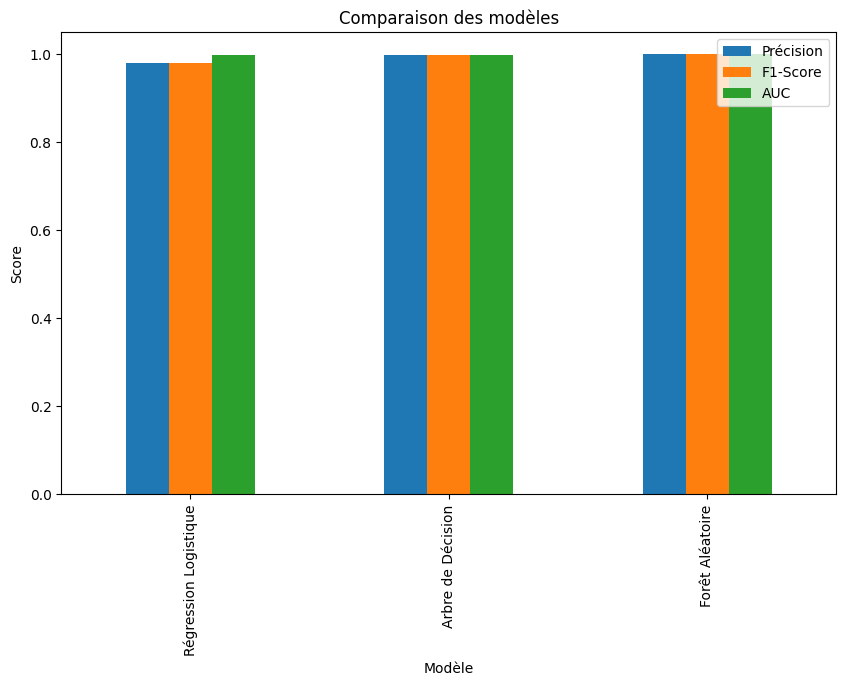

In [7]:
from sklearn.metrics import accuracy_score, f1_score

# Calcul des métriques pour chaque modèle
metrics = {
    'Modèle': ['Régression Logistique', 'Arbre de Décision', 'Forêt Aléatoire'],
    'Précision': [
        accuracy_score(y_test, y_pred_logistic),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_forest)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_logistic),
        f1_score(y_test, y_pred_tree),
        f1_score(y_test, y_pred_forest)
    ],
    'AUC': [auc_log, auc_tree, auc_forest]
}

# Affichage sous forme de DataFrame
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Visualisation
metrics_df.set_index('Modèle').plot(kind='bar', figsize=(10, 6))
plt.title("Comparaison des modèles")
plt.ylabel("Score")
plt.savefig('../results/report/evaluation/model-compare.png')
plt.show()


- **Précision et F1-Score :**
    - **La régression logistique** affiche une précision et un F1-score de 97.93 %, reflétant une bonne performance globale mais inférieure aux autres modèles.
    - L’**arbre de décision** améliore ces scores, atteignant 99.85 %.
    - La **forêt aléatoire** excelle avec une précision et un F1-score presque parfaits de 99.98 %, confirmant sa capacité à gérer des données complexes et déséquilibrées.

- **AUC :**
Bien que tous les modèles aient des AUC élevées, la forêt aléatoire reste en tête avec une valeur quasi parfaite de 0.9999, suivie par l’arbre de décision (0.9985) et enfin la régression logistique (0.9973).

## **Conclusion**

Dans ce dernier notebook, nous avons procédé à une évaluation approfondie des performances des modèles d'apprentissage supervisé (régression logistique, arbre de décision, et forêt aléatoire) pour la classification des transactions frauduleuses. L'objectif principal était d'identifier le modèle le plus performant, capable de détecter efficacement les fraudes tout en maintenant un faible taux de faux positifs.

La **forêt aléatoire** s'impose comme le modèle le plus performant pour la détection de fraudes, grâce à son équilibre entre précision, rappel, et capacité de discrimination (AUC). Elle offre des performances fiables pour ce problème, avec un risque minimal de faux négatifs, ce qui est crucial dans un contexte de détection de fraude.

Cependant, bien que la forêt aléatoire offre des résultats exceptionnels, son temps de calcul peut être plus élevé en production, notamment avec des données volumineuses. L’arbre de décision pourrait alors être une alternative intéressante si des compromis en termes de rapidité et performance sont nécessaires.

Enfin, ces résultats confirment l’importance d’une approche rigoureuse d’évaluation, à travers des courbes ROC, des courbes précision-rappel, et une analyse détaillée des métriques, pour sélectionner le modèle le plus adapté aux enjeux opérationnels et métiers.